# Figures for the GODEEEP Transportation Paper


In [2]:
# Start by importing the packages we need:
import os

import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt


## Set the Directory Structure


In [4]:
# Identify the top-level directory and the subdirectory where the data will be stored:
ba_data_input_dir =  '/Users/burl878/Documents/IMMM/GODEEP/Data/Merged_BA_Loads/'
image_output_dir =  '/Users/burl878/Documents/Papers/2023_Acharya_et_al/Figures/'


## Process the Transportation Statistics


In [41]:
# Define a function to compute the load ratios for given year and scenario:
def process_load_ratios(scenario_to_process: str, year_to_process: str, data_input_dir: str):
    
    # Read in the .csv file:
    load_df = pd.read_csv((data_input_dir + 'Total_Load_Time_Series_' + scenario_to_process + '_' + year_to_process + '.csv'))
    
    # Calculate the load ratio (transportation load divided by total load):
    load_df['Load_Ratio'] = (load_df['Transportation_Load_MWh']/load_df['Total_Load_MWh']).round(3)
    
    # Make a list of all of the BAs:
    bas = load_df['BA_Code'].unique()
    
    #Initiate a counter and empty dataframe to store the results:
    counter = 0;
    output_df = pd.DataFrame()
    
    # Loop over the BAs and process their data into an output file:
    for i in range(len(bas)):
        # Iterate the counter by one:
        counter = counter + 1
            
        # Subset to just the data for the BA being processed:
        subset_df = load_df[load_df['BA_Code'].isin([bas[i]])].copy()
        
        # Put the output in a new dataframe:
        output_df.loc[counter, 'BA'] = bas[i]
        output_df.loc[counter, 'System_Energy_Ratio'] = ((subset_df['Transportation_Load_MWh'].sum()) / (subset_df['Total_Load_MWh'].sum())).round(3)
        output_df.loc[counter, 'Peak_System_Ratio'] = subset_df['Load_Ratio'].loc[subset_df['Total_Load_MWh'].idxmax()].round(3)
        output_df.loc[counter, 'Peak_Transportation_Ratio'] = subset_df['Load_Ratio'].loc[subset_df['Transportation_Load_MWh'].idxmax()].round(3)
        
        # Clean up
        del subset_df
            
    return output_df
   

In [43]:
# Test the function for a given year and scenario:
output_df = process_load_ratios(scenario_to_process = 'BAU_Climate',
                                year_to_process = '2035',
                                data_input_dir = ba_data_input_dir)

output_df


,BA,System_Energy_Ratio,Peak_System_Ratio,Peak_Transportation_Ratio
1,AVA,0.066,0.068,0.080
2,AZPS,0.161,0.127,0.150
3,BANC,0.113,0.080,0.092
4,BPAT,0.080,0.068,0.091
5,CHPD,0.080,0.046,0.060
6,CISO,0.111,0.093,0.117
7,DOPD,0.048,0.038,0.081
8,EPE,0.057,0.034,0.099
9,GCPD,0.028,0.021,0.032
10,IID,0.461,0.384,0.423


In [100]:
# Define a function to plot the load ratios for given year and scenario:
def plot_load_ratios(scenario_to_plot: str, year_to_plot: str, data_input_dir: str, image_output_dir: str, image_resolution: int, save_images=False):
    
    if scenario_to_plot == 'BAU_Climate':
       scenario_label = 'Business as Usual'
    if scenario_to_plot == 'NetZeroNoCCS_Climate':
       scenario_label = 'Net Zero'
    
    # Process the data:
    plot_df = process_load_ratios(scenario_to_process = scenario_to_plot,
                                  year_to_process = year_to_plot,
                                  data_input_dir = ba_data_input_dir)
    
    # Create an x-axis the length of the dataframe to be used in plotting:
    x_axis = np.arange(len(plot_df))

    # Make the plot:
    plt.figure(figsize=(24, 12))
    plt.rcParams['font.size'] = 16
    
    plt.bar(x_axis - 0.2, plot_df['Peak_System_Ratio'], 0.2, label=('Ratio of transportation load to system load at system peak'))
    plt.bar(x_axis, plot_df['Peak_Transportation_Ratio'], 0.2, label=('Ratio of transportation load to system load at transportation peak'))
    plt.bar(x_axis + 0.2, plot_df['System_Energy_Ratio'], 0.2, label=('Ratio of yearly transportation energy to system energy'))
    plt.xticks(x_axis, plot_df['BA'])
    plt.xticks(rotation=90)
    plt.ylim([0, 1])
    plt.legend()
    plt.ylabel('Ratio')
    plt.grid(False)
    plt.title(('Comparison of Transportation to System Loads: ' + scenario_label + ', ' + year_to_plot))
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       filename = ('Transportation_Load_Ratios_' + scenario_to_plot + '_' + year_to_plot + '.png')
       plt.savefig(os.path.join(image_output_dir, filename), dpi=image_resolution, bbox_inches='tight', facecolor='white')
       #plt.close()
    

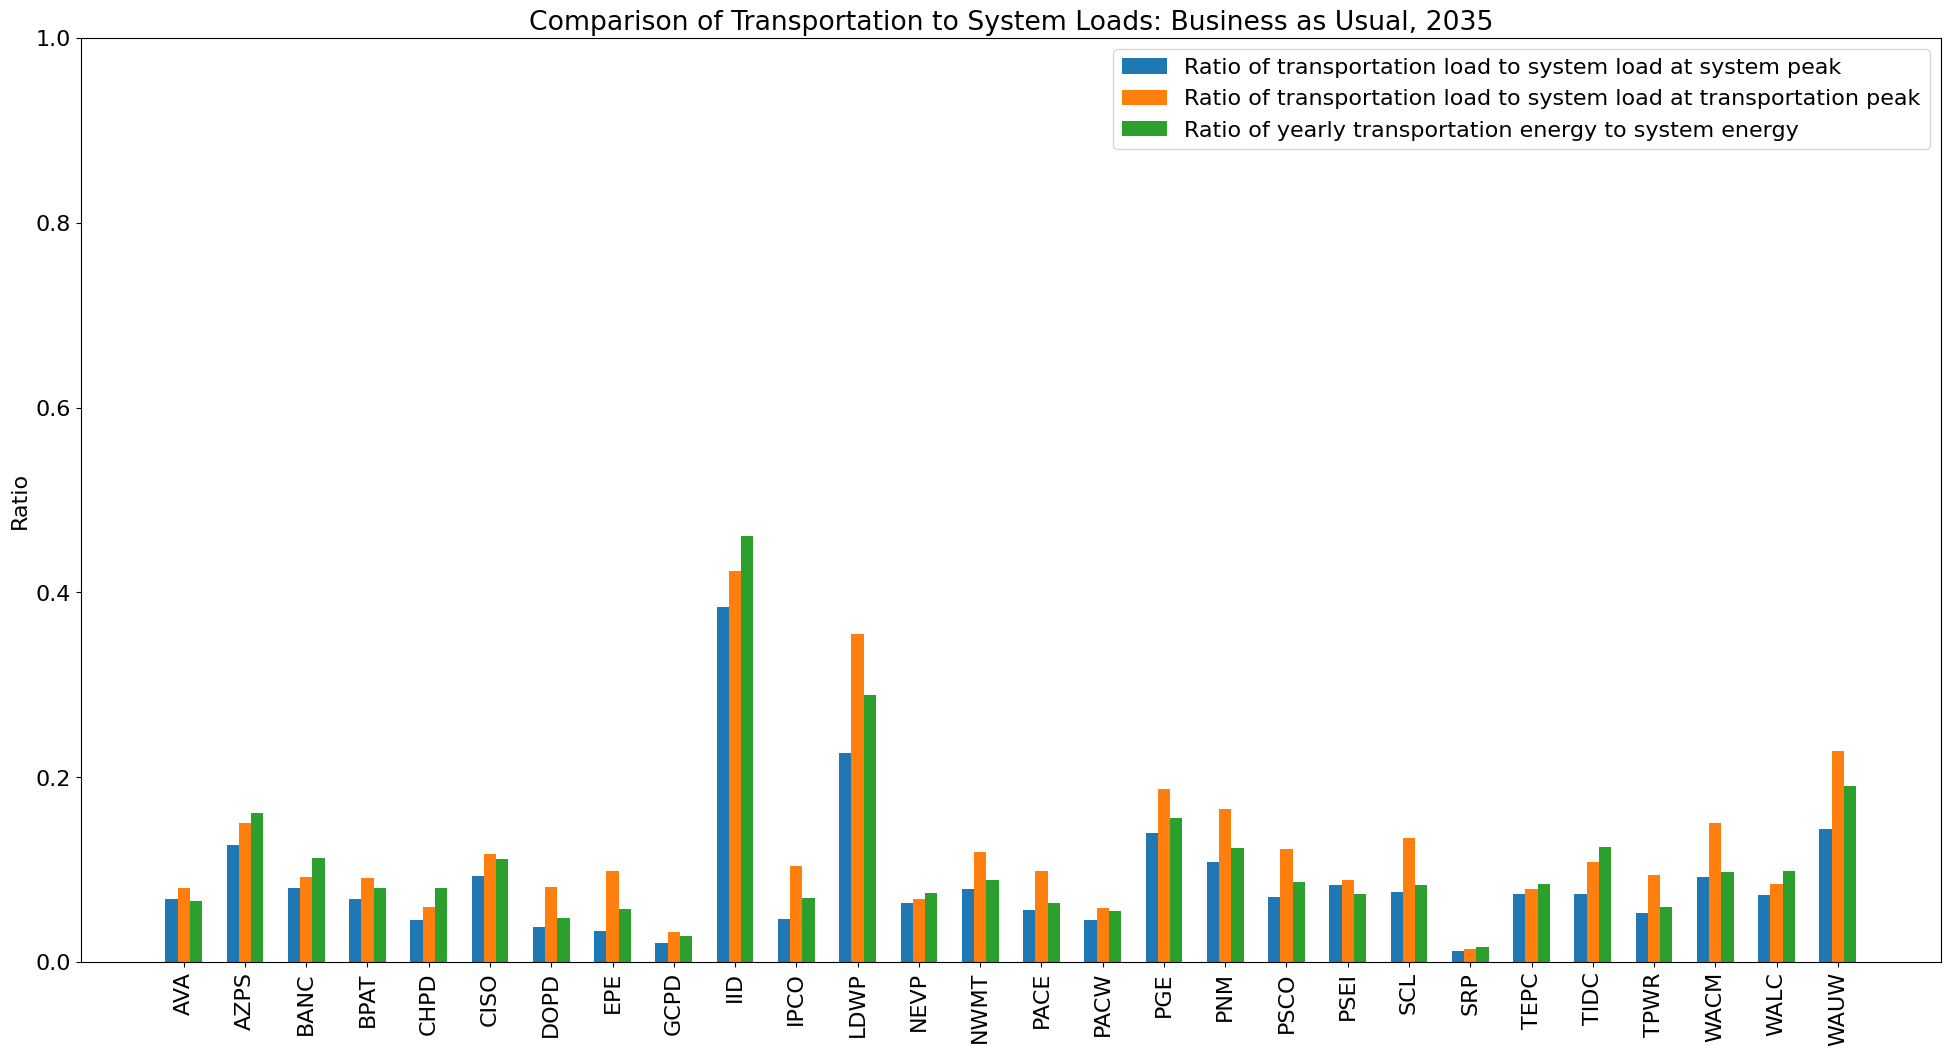

In [102]:
# Make the plot for a given year and scenario:
plot_load_ratios(scenario_to_plot = 'BAU_Climate',
                 year_to_plot = '2035',
                 data_input_dir = ba_data_input_dir,
                 image_output_dir = image_output_dir, 
                 image_resolution = 300, 
                 save_images = True)
